In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("tele.csv")
df

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls,Churn
0,1,56,Male,One Year,96.028982,1249.110874,4,5,0
1,2,69,Female,Two Year,33.710971,1570.074519,1,7,0
2,3,46,Male,Two Year,73.531013,1790.270343,4,9,1
3,4,32,Female,One Year,41.520187,492.452904,2,0,1
4,5,60,Male,Two Year,21.212077,594.571244,2,3,0
...,...,...,...,...,...,...,...,...,...
995,996,37,Male,Month-to-Month,34.080295,1054.704236,1,9,1
996,997,41,Male,One Year,82.241364,1664.320414,3,1,0
997,998,22,Male,One Year,98.132186,1156.592237,5,3,1
998,999,51,Male,Two Year,77.829840,696.748306,5,5,1


# Basic understand of data

In [40]:
df.shape

(1000, 9)

In [41]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'ContractType', 'MonthlyCharges',
       'TotalSpent', 'DevicesConnected', 'SupportCalls', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Gender            1000 non-null   object 
 3   ContractType      1000 non-null   object 
 4   MonthlyCharges    1000 non-null   float64
 5   TotalSpent        1000 non-null   float64
 6   DevicesConnected  1000 non-null   int64  
 7   SupportCalls      1000 non-null   int64  
 8   Churn             1000 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB


In [43]:
df.describe()

,CustomerID,Age,MonthlyCharges,TotalSpent,DevicesConnected,SupportCalls,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,46.247000,69.796056,999.657900,3.007000,4.545000,0.499000
std,288.819436,16.288072,28.811134,495.841431,1.402469,2.906962,0.500249
min,1.000000,18.000000,20.013469,-495.567985,1.000000,0.000000,0.000000
25%,250.750000,33.000000,45.995207,674.729914,2.000000,2.000000,0.000000
50%,500.500000,46.000000,69.932841,996.970666,3.000000,5.000000,0.000000
75%,750.250000,60.250000,94.941426,1325.616340,4.000000,7.000000,1.000000
max,1000.000000,74.000000,119.834751,2963.118853,5.000000,9.000000,1.000000


In [44]:
df.dtypes

CustomerID            int64
Age                   int64
Gender               object
ContractType         object
MonthlyCharges      float64
TotalSpent          float64
DevicesConnected      int64
SupportCalls          int64
Churn                 int64
dtype: object

# Data Cleaning

In [45]:
# To count the null values
df.isnull().sum()

CustomerID          0
Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalSpent          0
DevicesConnected    0
SupportCalls        0
Churn               0
dtype: int64

In [46]:
# Find all duplicated rows
duplicates = df[df.duplicated()]

# Count the number of duplicated rows
duplicate_count = duplicates.shape[0]

print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


In [47]:
for x in df.columns:
  print("nunique",x)
  print(df[x].nunique())
  print(" ")

nunique CustomerID
1000
 
nunique Age
57
 
nunique Gender
2
 
nunique ContractType
3
 
nunique MonthlyCharges
1000
 
nunique TotalSpent
1000
 
nunique DevicesConnected
5
 
nunique SupportCalls
10
 
nunique Churn
2
 


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Gender            1000 non-null   object 
 3   ContractType      1000 non-null   object 
 4   MonthlyCharges    1000 non-null   float64
 5   TotalSpent        1000 non-null   float64
 6   DevicesConnected  1000 non-null   int64  
 7   SupportCalls      1000 non-null   int64  
 8   Churn             1000 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB


In [49]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'ContractType', 'MonthlyCharges',
       'TotalSpent', 'DevicesConnected', 'SupportCalls', 'Churn'],
      dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Apply Label Encoding to all categorical columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if you need to inverse transform later

print(df)

     CustomerID  Age  Gender  ContractType  MonthlyCharges   TotalSpent  \
0             1   56       1             1       96.028982  1249.110874   
1             2   69       0             2       33.710971  1570.074519   
2             3   46       1             2       73.531013  1790.270343   
3             4   32       0             1       41.520187   492.452904   
4             5   60       1             2       21.212077   594.571244   
..          ...  ...     ...           ...             ...          ...   
995         996   37       1             0       34.080295  1054.704236   
996         997   41       1             1       82.241364  1664.320414   
997         998   22       1             1       98.132186  1156.592237   
998         999   51       1             2       77.829840   696.748306   
999        1000   23       0             0       34.696271  1227.952098   

     DevicesConnected  SupportCalls  Churn  
0                   4             5      0  
1        

In [51]:
for x in df.columns:
    print(f"Column: {x}")
    print(df[x].value_counts())  # Shows unique values and their counts
    print(" ")


Column: CustomerID
CustomerID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
 
Column: Age
Age
50    27
52    26
45    26
66    24
56    23
49    23
54    22
18    22
41    22
70    22
43    22
22    21
71    21
42    20
29    20
69    20
40    20
19    19
61    19
34    19
68    19
53    19
65    19
62    19
25    19
33    19
46    18
20    18
72    17
64    17
36    17
47    17
26    16
38    16
39    16
74    16
59    15
51    15
30    15
58    15
67    15
32    14
28    14
27    14
23    14
57    14
37    14
31    14
44    14
55    13
21    13
35    13
24    13
48    12
73    11
63    11
60     7
Name: count, dtype: int64
 
Column: Gender
Gender
1    523
0    477
Name: count, dtype: int64
 
Column: ContractType
ContractType
1    351
0    336
2    313
Name: count, dtype: int64
 
Column: MonthlyCharges
MonthlyCharges
96.028982     1
58.798676     1
56.459373     1
41.789255     1
11

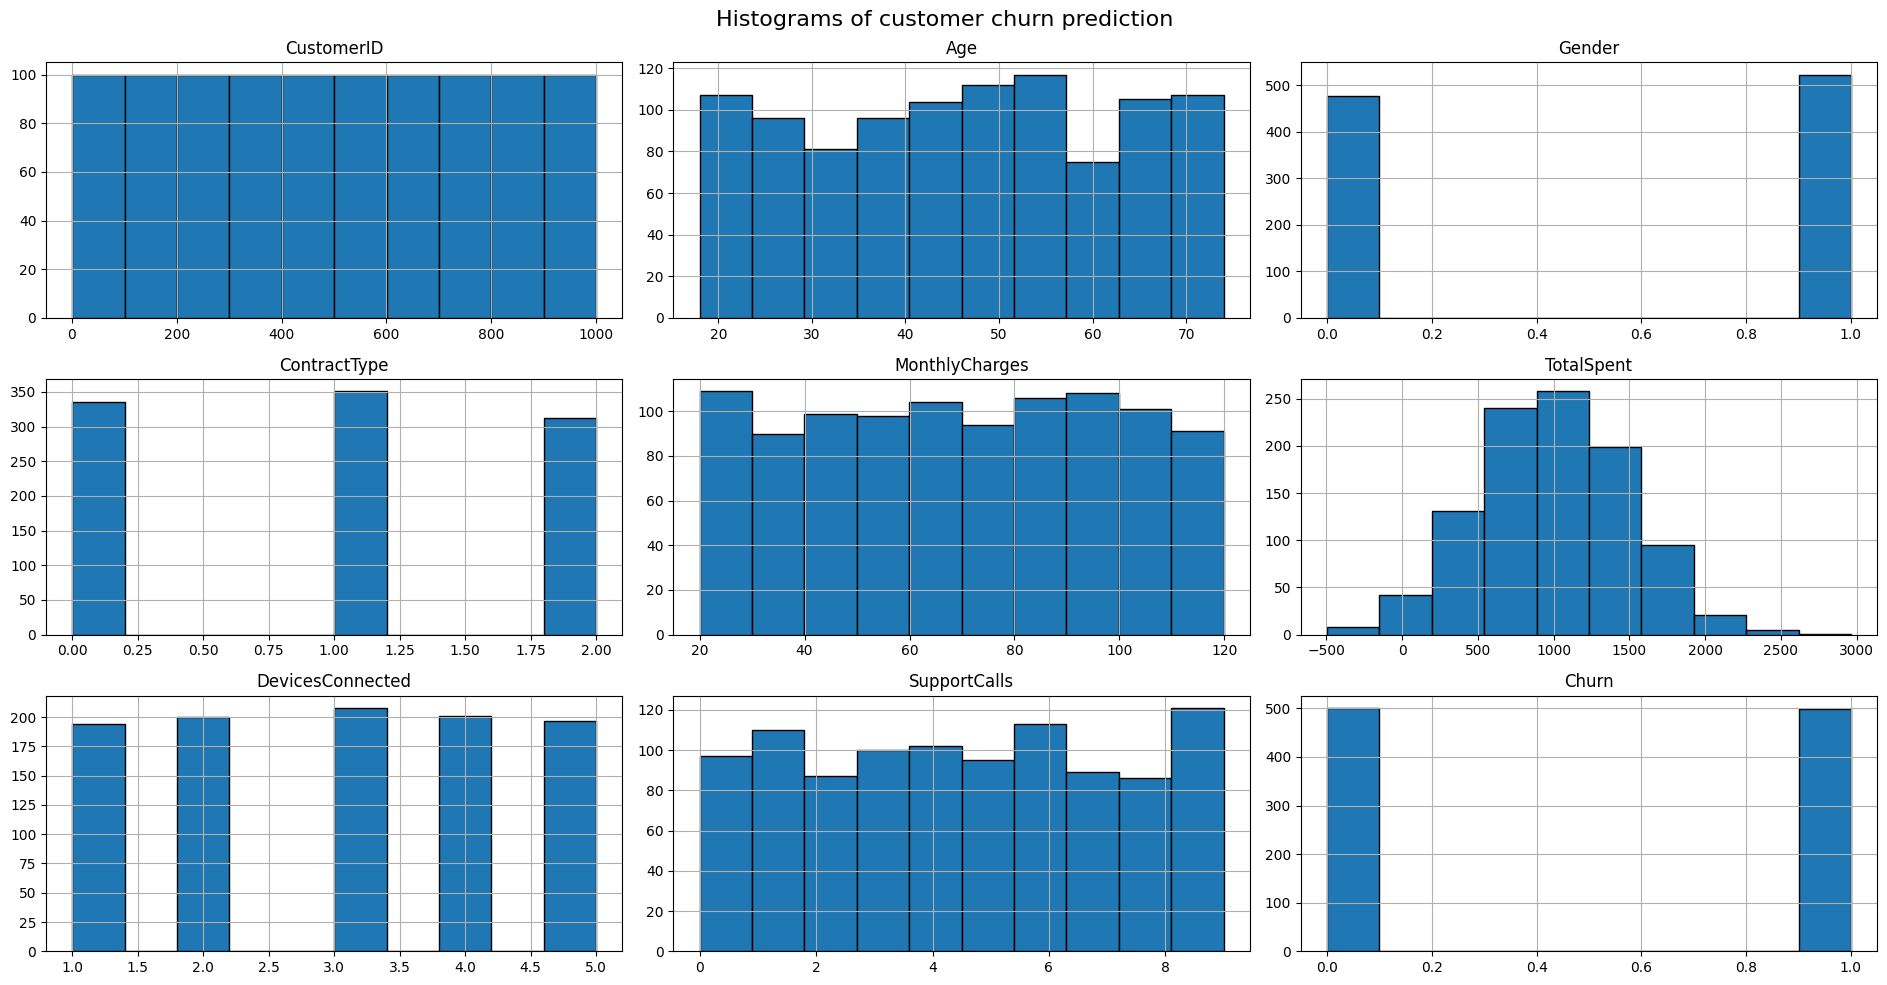

In [52]:
# Histogram
df.hist(edgecolor='black',figsize=(19,10))
plt.suptitle('Histograms of customer churn prediction',fontsize=16)
plt.tight_layout()
plt.show()

# Correlation analysis

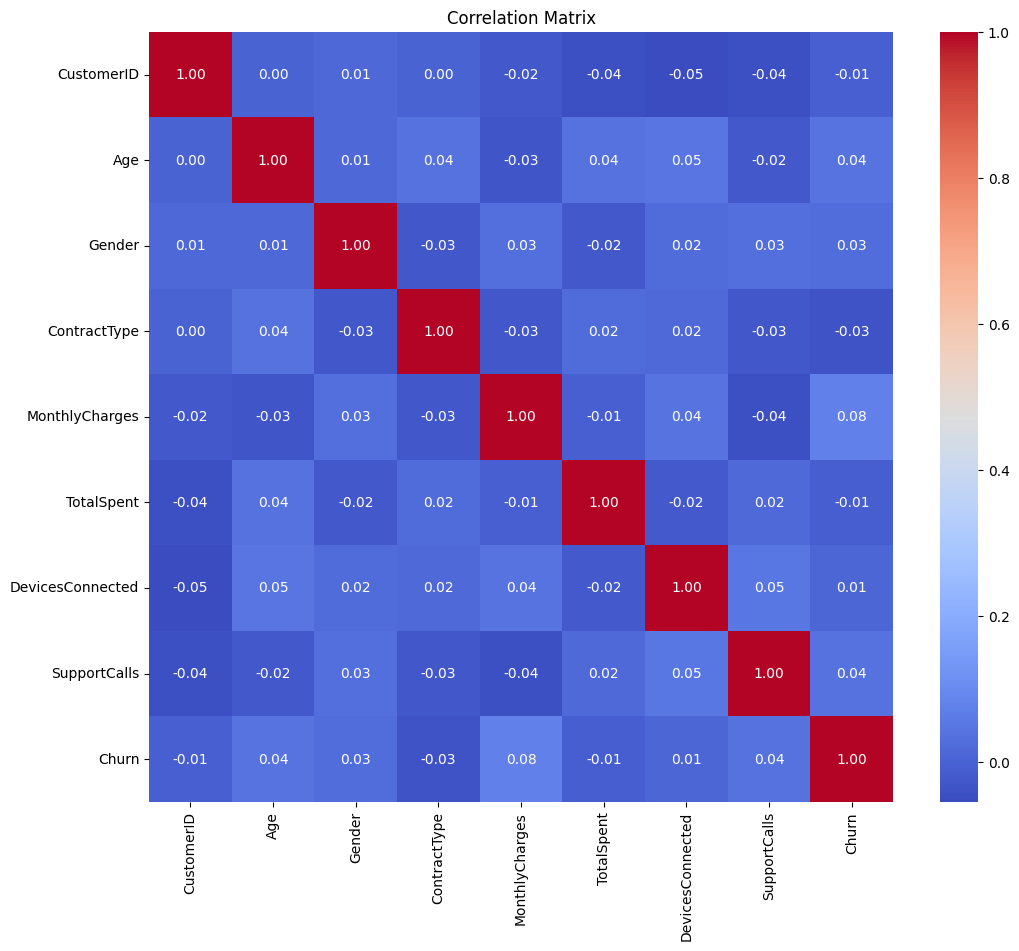

In [53]:
# Correlation matrix heatmap
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [54]:
df.skew()

CustomerID          0.000000
Age                -0.042474
Gender             -0.092236
ContractType        0.041726
MonthlyCharges     -0.030369
TotalSpent          0.027625
DevicesConnected   -0.005914
SupportCalls        0.003777
Churn               0.004006
dtype: float64

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [56]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [57]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# model = GradientBoostingClassifier(n_estimators=400,
#                                    learning_rate=0.05,
#                                    random_state=100)
# model.fit(X_train, y_train)

In [60]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# model = DecisionTreeClassifier(
#     criterion="gini",
#     max_depth=5,
#     min_samples_split=7,
#     min_samples_leaf=7,
#     max_features="sqrt",
#     random_state=42
# )
# model.fit(X_train, y_train)

In [62]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       102
           1       0.52      0.50      0.51        98

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

Confusion Matrix:
 [[57 45]
 [49 49]]


In [63]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(model,f)

In [64]:
with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)